# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.warn("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

In [3]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense ,Reshape
from keras.layers import Flatten, LSTM,Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D

Using TensorFlow backend.


## 1.1 Reading Data

In [4]:
#https://stackabuse.com/python-for-nlp-creating-multi-data-type-classification-models-with-keras/
#https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
#https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
#https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [5]:
preprocessed_data = pd.read_csv('preprocessed_data.csv')

In [6]:
print("Number of data points in preprocessed data", preprocessed_data.shape)

Number of data points in preprocessed data (109248, 9)


In [7]:
preprocessed_data=preprocessed_data.sample(n=100000)
preprocessed_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
18443,nh,mrs,grades_6_8,10,1,math_science,appliedsciences,as teacher would like bring world students bei...,233.39
40592,ut,mrs,grades_3_5,2,0,math_science history_civics,environmentalscience socialsciences,my creative students yearning learn world arou...,305.97
42780,ar,mrs,grades_6_8,0,0,math_science,environmentalscience health_lifescience,despite majority students come broken homes li...,432.66
80870,mo,mrs,grades_prek_2,3,1,appliedlearning,earlydevelopment,every student learn not day way george evans i...,168.86
36203,ny,mr,grades_prek_2,113,1,literacy_language,literacy literature_writing,our pre k students diverse borough new york ci...,224.65


In [8]:
X=preprocessed_data.drop(columns=['project_is_approved'],axis=1)
y=preprocessed_data['project_is_approved']

In [9]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

# split the train data set into cross validation train and cross validation test
X_train, X_cv, y_train, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.2, random_state=0,stratify=y_1)

In [11]:
y_train = to_categorical(y_train)
y_cv   = to_categorical(y_cv)
y_test = to_categorical(y_test)

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['essay'].values)

X1_tr = np.array(tokenizer.texts_to_sequences(X_train['essay'].values))
X1_cv = np.array(tokenizer.texts_to_sequences(X_cv['essay'].values))
X1_test = np.array(tokenizer.texts_to_sequences(X_test['essay'].values))

In [13]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X1_tr = pad_sequences(X1_tr, padding='post', maxlen=maxlen)
X1_cv = pad_sequences(X1_cv, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [14]:
print(X1_tr.shape)
print(X1_cv.shape)
print(X1_test.shape)

(6400, 200)
(1600, 200)
(2000, 200)


In [15]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [16]:
embeddings_dictionary = dict()
for word in glove_words:
    vector_dimensions = model[word]
    embeddings_dictionary [word] = vector_dimensions

In [17]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [18]:
embedding_matrix.shape

(19134, 300)

In [19]:
input_1 = Input(shape=(maxlen,),name='essay_input')
print(input_1.shape)
input_1_embedding = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False )(input_1)
print(input_1_embedding.shape)
input_1_lstm = LSTM(128,return_sequences=True)(input_1_embedding)
print(input_1_lstm.shape)
input_1_flatten=Flatten()(input_1_lstm)
print(input_1_flatten.shape)

(?, 200)
Instructions for updating:
Colocations handled automatically by placer.
(?, 200, 300)
(?, ?, 128)
(?, ?)


In [20]:
categoricals=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
numericals=['teacher_number_of_previously_posted_projects','price']

In [21]:
embed_cols=[i for i in X_train[categoricals]]

for i in embed_cols:
    print(i,X_train[i].nunique())

school_state 51
teacher_prefix 4
project_grade_category 4
clean_categories 47
clean_subcategories 273


In [22]:
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
vectorizer = CountVectorizer()
X2_tr = vectorizer.fit_transform(X_train['school_state'].values).toarray()
X2_cv = vectorizer.transform(X_cv['school_state'].values).toarray()
X2_test = vectorizer.transform(X_test['school_state'].values).toarray()
cat_emb_name= 'school_state_Embedding'
no_of_unique_cat  = X_train['school_state'].nunique()
embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
input_2 = Input(shape=(X2_tr.shape[1],),name='school_state_input')
print(input_2.shape)
input_2_embedding = Embedding(no_of_unique_cat, embedding_size,input_length=X2_tr.shape[1], name=cat_emb_name)(input_2)
print(input_2_embedding.shape)
input_2_flatten=Flatten()(input_2_embedding)
print(input_2_flatten.shape)

(?, 51)
(?, 51, 26)
(?, ?)


In [24]:
print(X2_tr.shape)
print(X2_cv.shape)
print(X2_test.shape)

(6400, 51)
(1600, 51)
(2000, 51)


In [25]:
vectorizer = CountVectorizer()
X3_tr = vectorizer.fit_transform(X_train['teacher_prefix'].values.astype('U')).toarray()
X3_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U')).toarray()
X3_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U')).toarray()
cat_emb_name= 'teacher_prefix_Embedding'
no_of_unique_cat  = X_train['teacher_prefix'].nunique()
embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
input_3 = Input(shape=(X3_tr.shape[1],),name='teacher_prefix_input')
print(input_3.shape)
input_3_embedding = Embedding(no_of_unique_cat, embedding_size,input_length=X3_tr.shape[1], name=cat_emb_name)(input_3)
print(input_3_embedding.shape)
input_3_flatten=Flatten()(input_3_embedding)
print(input_3_flatten.shape)

(?, 4)
(?, 4, 2)
(?, ?)


In [26]:
print(X3_tr.shape)
print(X3_cv.shape)
print(X3_test.shape)

(6400, 4)
(1600, 4)
(2000, 4)


In [27]:
vectorizer = CountVectorizer()
X4_tr = vectorizer.fit_transform(X_train['project_grade_category'].values).toarray()
X4_cv = vectorizer.transform(X_cv['project_grade_category'].values).toarray()
X4_test = vectorizer.transform(X_test['project_grade_category'].values).toarray()
cat_emb_name= 'project_grade_category_Embedding'
no_of_unique_cat  = X_train['project_grade_category'].nunique()
embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
input_4 = Input(shape=(X4_tr.shape[1],),name='project_grade_category_input')
print(input_4.shape)
input_4_embedding = Embedding(no_of_unique_cat, embedding_size,input_length=X4_tr.shape[1],name=cat_emb_name)(input_4)
print(input_4_embedding.shape)
input_4_flatten=Flatten()(input_4_embedding)
print(input_4_flatten.shape)

(?, 4)
(?, 4, 2)
(?, ?)


In [28]:
print(X4_tr.shape)
print(X4_cv.shape)
print(X4_test.shape)

(6400, 4)
(1600, 4)
(2000, 4)


In [29]:
vectorizer = CountVectorizer()
X5_tr = vectorizer.fit_transform(X_train['clean_categories'].values).toarray()
X5_cv = vectorizer.transform(X_cv['clean_categories'].values).toarray()
X5_test = vectorizer.transform(X_test['clean_categories'].values).toarray()
cat_emb_name= 'clean_categories_Embedding'
no_of_unique_cat  = X_train['clean_categories'].nunique()
embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
input_5 = Input(shape=(X5_tr.shape[1],),name='clean_categories_input')
print(input_5.shape)
input_5_embedding = Embedding(no_of_unique_cat, embedding_size,input_length=X5_tr.shape[1], name=cat_emb_name)(input_5)
print(input_5_embedding.shape)
input_5_flatten=Flatten()(input_5_embedding)
print(input_5_flatten.shape)

(?, 9)
(?, 9, 24)
(?, ?)


In [30]:
print(X5_tr.shape)
print(X5_cv.shape)
print(X5_test.shape)

(6400, 9)
(1600, 9)
(2000, 9)


In [31]:
vectorizer = CountVectorizer()
X6_tr = vectorizer.fit_transform(X_train['clean_subcategories'].values).toarray()
X6_cv = vectorizer.transform(X_cv['clean_subcategories'].values).toarray()
X6_test = vectorizer.transform(X_test['clean_subcategories'].values).toarray()
cat_emb_name= 'clean_subcategories_Embedding'
no_of_unique_cat  = X_train['clean_subcategories'].nunique()
embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
input_6 = Input(shape=(X6_tr.shape[1],),name='clean_subcategories_input')
print(input_6.shape)
input_6_embedding = Embedding(no_of_unique_cat, embedding_size,input_length=X6_tr.shape[1], name=cat_emb_name)(input_6)
print(input_6_embedding.shape)
input_6_flatten=Flatten()(input_6_embedding)
print(input_6_flatten.shape)

(?, 30)
(?, 30, 50)
(?, ?)


In [32]:
print(X6_tr.shape)
print(X6_cv.shape)
print(X6_test.shape)

(6400, 30)
(1600, 30)
(2000, 30)


In [70]:
X7_tr = preprocessing.normalize(X_train[['teacher_number_of_previously_posted_projects', 'price']]) 
X7_cv = preprocessing.normalize(X_cv[['teacher_number_of_previously_posted_projects', 'price']])
X7_test = preprocessing.normalize(X_test[['teacher_number_of_previously_posted_projects', 'price']])
input_7 = Input(shape=(len(X_train[numericals].columns),),name='numerical_input')
print(input_7.shape)
input_7_dense = Dense(128)(input_7)
print(input_7_dense.shape)

(?, 2)
(?, 128)


In [34]:
print(X7_tr.shape)
print(X7_cv.shape)
print(X7_test.shape)

(6400, 2)
(1600, 2)
(2000, 2)


In [35]:
#At the end we concatenate altogther and add other Dense layers
output_1 = Concatenate()([input_1_flatten,input_2_flatten,input_3_flatten,input_4_flatten,input_5_flatten,input_6_flatten,input_7_dense])
output_1 = Dense(256,activation='relu')(output_1)
output_1= Dropout(0.4)(output_1)
output_1 = Dense(128,activation='relu')(output_1)
output_1= Dropout(0.3)(output_1)
output_1 = Dense(64,activation='relu')(output_1)
output_1 = Dense(2, activation='softmax')(output_1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
import tensorflow as tf
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [37]:
from keras import optimizers
model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7], outputs=output_1)
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9) ,metrics=[auroc])
model.summary()

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 300)     5740200     essay_input[0][0]                
_______________________________________________________________________

In [38]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [39]:
history = model.fit(x=[X1_tr,X2_tr,X3_tr,X4_tr, X5_tr, X6_tr,X7_tr], y=y_train, validation_data=([X1_cv,X2_cv,X3_cv,X4_cv, X5_cv, X6_cv,X7_cv],y_cv),epochs=12,batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/2
 - 64s - loss: 0.4567 - auroc: 0.5224 - val_loss: 0.4102 - val_auroc: 0.6022
Epoch 2/2
 - 63s - loss: 0.4241 - auroc: 0.5370 - val_loss: 0.4164 - val_auroc: 0.6048


In [40]:
score = model.evaluate(x=[X1_test,X2_test,X3_test,X4_test, X5_test, X6_test, X7_test], y=y_test, verbose=2)

In [41]:
print("Test Loss:", score[0])
print("Test AUC:", score[1])

Test Loss: 0.41911830091476443
Test AUC: 0.5714259138641857


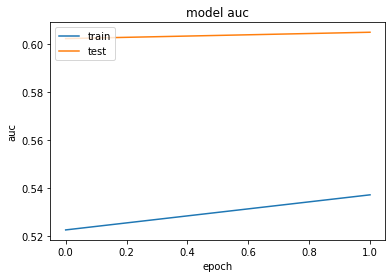

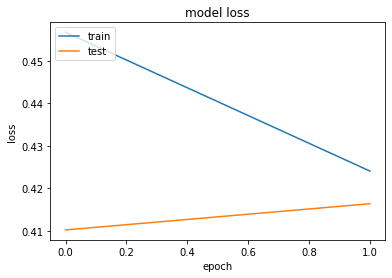

In [42]:
plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])

plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [43]:
# serialize weights to HDF5
model.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


## Model 2

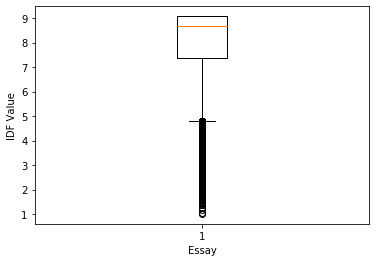

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)
plt.boxplot(list(vectorizer.idf_))
plt.xlabel('Essay')
plt.ylabel('IDF Value')
plt.show()




In [45]:
tenth_percentile=np.quantile((vectorizer.idf_),0.10)
ninty_percentile=np.quantile((vectorizer.idf_),0.90)
print(tenth_percentile)
print(ninty_percentile)
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
filterred_words=[]
for k,v in dictionary.items():
    if v > tenth_percentile and v < ninty_percentile:
        filterred_words.append(k)
        
len(filterred_words)

5.793917593589882
9.071062326582059


9784

In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filterred_words)

X8_tr = np.array(tokenizer.texts_to_sequences(X_train['essay'].values))
X8_cv = np.array(tokenizer.texts_to_sequences(X_cv['essay'].values))
X8_test = np.array(tokenizer.texts_to_sequences(X_test['essay'].values))

In [47]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X8_tr = pad_sequences(X8_tr, padding='post', maxlen=maxlen)
X8_cv = pad_sequences(X8_cv, padding='post', maxlen=maxlen)
X8_test = pad_sequences(X8_test, padding='post', maxlen=maxlen)

In [48]:
print(X8_tr.shape)
print(X8_cv.shape)
print(X8_test.shape)

(6400, 200)
(1600, 200)
(2000, 200)


In [49]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [50]:
embeddings_dictionary = dict()
for word in glove_words:
    vector_dimensions = model[word]
    embeddings_dictionary [word] = vector_dimensions

In [51]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [52]:
embedding_matrix.shape

(9785, 300)

In [53]:
input_8 = Input(shape=(maxlen,),name='essay_tfidf_input')
print(input_8.shape)
input_8_embedding = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False )(input_8)
print(input_8_embedding.shape)
input_8_lstm = LSTM(128,return_sequences=True)(input_8_embedding)
print(input_8_lstm.shape)
input_8_flatten=Flatten()(input_8_lstm)
print(input_8_flatten.shape)

(?, 200)
(?, 200, 300)
(?, ?, 128)
(?, ?)


In [54]:
#At the end we concatenate altogther and add other Dense layers
output_2 = Concatenate()([input_8_flatten,input_2_flatten,input_3_flatten,input_4_flatten,input_5_flatten,input_6_flatten,input_7_dense])
output_2 = Dense(256, kernel_initializer="uniform",activation='relu')(output_2)
output_2= Dropout(0.4)(output_2)
output_2 = Dense(128, kernel_initializer="uniform",activation='relu')(output_2)
output_2= Dropout(0.3)(output_2)
output_2 = Dense(64, kernel_initializer="uniform", activation='relu')(output_2)
output_2 = Dense(2, activation='softmax')(output_2)

In [55]:
model_2 = Model(inputs=[input_8,input_2,input_3,input_4,input_5,input_6,input_7], outputs=output_2)
model_2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001) ,metrics=[auroc])
model_2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_tfidf_input (InputLayer)  (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 300)     2935500     essay_tfidf_input[0][0]          
__________________________________________________________________________________________________
school_state_input (InputLayer) (None, 51)           0                                            
__________________________________________________________________________________________________
teacher_prefix_input (InputLaye (None, 4)            0                                            
__________________________________________________________________________________________________
project_gr

In [56]:
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)

In [57]:
history = model_2.fit(x=[X8_tr,X2_tr,X3_tr,X4_tr, X5_tr, X6_tr,X7_tr], y=y_train, validation_data=([X8_cv,X2_cv,X3_cv,X4_cv, X5_cv, X6_cv,X7_cv],y_cv),epochs=2,batch_size=300,verbose=2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/2
 - 79s - loss: 0.5617 - auroc: 0.5345 - val_loss: 0.4228 - val_auroc: 0.5619
Epoch 2/2
 - 74s - loss: 0.4290 - auroc: 0.5489 - val_loss: 0.4145 - val_auroc: 0.5728


In [58]:
score = model_2.evaluate(x=[X8_test,X2_test,X3_test,X4_test, X5_test, X6_test, X7_test], y=y_test, verbose=2)

In [59]:
print("Test Loss:", score[0])
print("Test AUC:", score[1])

Test Loss: 0.41790649604797364
Test AUC: 0.5482413019110881


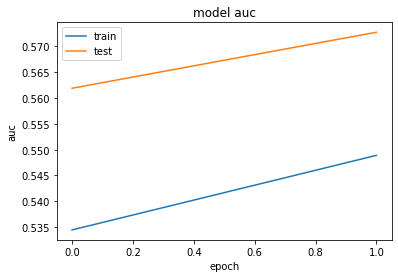

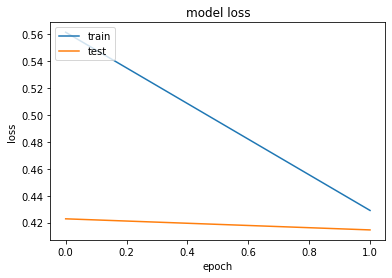

In [60]:
plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])

plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [61]:
# serialize weights to HDF5
model_2.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


## Model 3

In [72]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X9_tr = scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X9_cv = scalar.transform(X_cv['price'].values.reshape(-1,1))
X9_test = scalar.transform(X_test['price'].values.reshape(-1,1))
print(X9_tr.shape)
print(X9_cv.shape)
print(X9_test.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [73]:
scalar = StandardScaler()
X10_tr = scalar.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
X10_cv = scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
X10_test = scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(X10_tr.shape)
print(X10_cv.shape)
print(X10_test.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [90]:
numeric_tr = np.hstack((X2_tr,X3_tr,X4_tr,X5_tr,X6_tr,X9_tr,X10_tr))
numeric_cv = np.hstack((X2_cv,X3_cv,X4_cv,X5_cv,X6_cv,X9_cv,X10_cv))
numeric_test = np.hstack((X2_test,X3_test,X4_test,X5_test,X6_test,X9_test,X10_test))
print(numeric_tr.shape)
print(numeric_cv.shape)
print(numeric_test.shape)

(6400, 100)
(1600, 100)
(2000, 100)


In [91]:
numeric_tr=np.expand_dims(numeric_tr,axis=2)
numeric_cv=np.expand_dims(numeric_cv,axis=2)
numeric_test=np.expand_dims(numeric_test,axis=2)
print(numeric_tr.shape)
print(numeric_cv.shape)
print(numeric_test.shape)

(6400, 100, 1)
(1600, 100, 1)
(2000, 100, 1)


In [99]:
input_9 = Input(shape=(numeric_tr.shape[1],numeric_tr.shape[2],),name='combined_input')
print(input_9.shape)

(?, 100, 1)


In [101]:
#At the end we concatenate altogther and add other Dense layers

#output_3=tf.reshape(output_3,[-1,output_3.shape[1],output_3.shape[1]])
#print(output_3.shape)
output_3 = Conv1D(128, 5, strides=1,activation="relu")(input_9)
output_3 = MaxPooling1D(pool_size=5)(output_3)
output_3 = Conv1D(64, 5, activation="relu")(output_3)
output_3 = MaxPooling1D(pool_size=5)(output_3)
output_3 = Flatten()(output_3)

output_4 = Concatenate()([input_1_flatten,output_3])
output_4 = Dense(256, kernel_initializer="uniform",activation='relu')(output_4)
output_4= Dropout(0.4)(output_4)
output_4 = Dense(128, kernel_initializer="uniform",activation='relu')(output_4)
output_4= Dropout(0.3)(output_4)
output_4 = Dense(64, kernel_initializer="uniform", activation='relu')(output_4)
output_4 = Dense(2, activation='softmax')(output_4)

In [102]:
from keras import optimizers
model_3 = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_9], outputs=output_4)
model_3.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9) ,metrics=[auroc])
model_3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
combined_input (InputLayer)     (None, 100, 1)       0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 96, 128)      768         combined_input[0][0]             
__________________________________________________________________________________________________
essay_input (InputLayer)        (None, 200)          0                                            
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, 19, 128)      0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
embedding_

In [104]:
plot_model(model_3, to_file='model_3.png', show_shapes=True, show_layer_names=True)

In [105]:
history = model_3.fit(x=[X8_tr,X2_tr,X3_tr,X4_tr, X5_tr, X6_tr,numeric_tr], y=y_train, validation_data=([X8_cv,X2_cv,X3_cv,X4_cv, X5_cv, X6_cv,numeric_cv],y_cv),epochs=2,batch_size=300,verbose=2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/2
 - 77s - loss: 0.5632 - auroc: 0.5242 - val_loss: 0.4273 - val_auroc: 0.5514
Epoch 2/2
 - 74s - loss: 0.4159 - auroc: 0.5404 - val_loss: 0.4155 - val_auroc: 0.5607


In [106]:
score = model_3.evaluate(x=[X8_test,X2_test,X3_test,X4_test, X5_test, X6_test, numeric_test], y=y_test, verbose=2)

In [107]:
print("Test Loss:", score[0])
print("Test AUC:", score[1])

Test Loss: 0.415793185710907
Test AUC: 0.5500313622405458


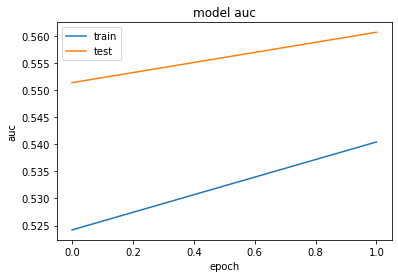

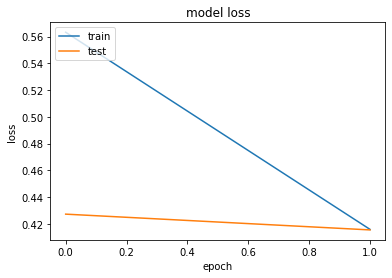

In [108]:
plt.plot(history.history['auroc'])
plt.plot(history.history['val_auroc'])

plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [109]:
# serialize weights to HDF5
model_3.save_weights("model_3.h5")
print("Saved model to disk")

Saved model to disk
